# IMPORTING THE VARIOUS LIBRARIES REQUIRED

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# IMPORTING THE DATASET

In [37]:
data =pd.read_csv('data.csv',header=None)

In [38]:
data.head(5)

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [39]:
X=np.array(data[[0,1]])
y=np.array(data[2])

# PLOTTING THE DATASET

In [40]:
def plot_points(X,y):
    admitted=X[np.argwhere(y==1)]
    rejected=X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected],[s[0][1] for s in rejected],s=25,color='blue',edgecolor='k')
    plt.scatter([s[0][0] for s in admitted],[s[0][1] for s in admitted],s=25,color='red',edgecolor='k')
def display(m,b,color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x=np.arange(-10,10,0.1)
    plt.plot(x,m*x+b,color)

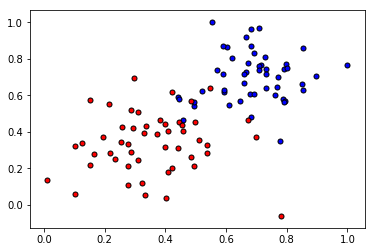

In [41]:
plot_points(X,y)
plt.show()

# DEFINING THE VARIOUS FUNCTIONS

In [42]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def output_formula(features,weights,bias):
    return sigmoid(np.dot(features,weights)+bias)
def error_formula(y,output):
    return (-y*np.log(output)+(1-y)*np.log(1-output))
def update_weights(x,y,weights,bias,learnrate):
    output=output_formula(x,weights,bias)
    d_error=y-output
    weights+=learnrate*d_error*x
    bias+=learnrate*d_error
    return weights,bias

# TRAINING THE MODEL

In [43]:
np.random.seed(44)
epochs=100
learnrate=0.01

def train(features,targets,epochs,learnrate,graph_lines=False):
    errors=[]
    n_records,n_features=features.shape
    last_loss=None
    weights=np.random.normal(scale=1/n_features**.5,size=n_features)
    bias=0
    for e in range(epochs):
        del_w=np.zeros(weights.shape)
        for x,y in zip(features,targets):
            output=output_formula(features,weights,bias)
            error=error_formula(y,output)
            weights,bias=update_weights(x,y,weights,bias,learnrate)
            
        out=output_formula(features,weights,bias)
        loss=np.mean(error_formula(targets,out))
        errors.append(loss)
        if e%(epochs/10)==0:
            print("<--","Epoch",e,"-->")
            if last_loss and last_loss<loss:
                print("Train Loss:",loss,"WARNING- LOSS INCREASING")
            else:
                print("Train loss:",loss)
            last_loss=loss
            predictions=out > 0.5
            accuracy=np.mean(predictions==targets)
            print("Accuracy:",accuracy)
        if graph_lines and e%(epochs/100)==0:
            display(-weights[0]/weights[1],-bias/weights[1])
    plt.title("Solution Boundary")
    display(-weights[0]/weights[1],-bias/weights[1],'black')
    
    plot_points(features,targets)
    plt.show()
    
    plt.title("Error Plot")
    plt.xlabel("Number of epochs-->")
    plt.ylabel("Error-->")
    plt.plot(errors)
    plt.show()

<-- Epoch 0 -->
Train loss: -0.001635885803963908
Accuracy: 0.4
<-- Epoch 10 -->
Train Loss: 0.1731078024236241 WARNING- LOSS INCREASING
Accuracy: 0.59
<-- Epoch 20 -->
Train loss: 0.14805218621137747
Accuracy: 0.74
<-- Epoch 30 -->
Train loss: 0.12628815990964293
Accuracy: 0.84
<-- Epoch 40 -->
Train loss: 0.10957125901546412
Accuracy: 0.86
<-- Epoch 50 -->
Train loss: 0.096516812274257
Accuracy: 0.93
<-- Epoch 60 -->
Train loss: 0.08612377653826854
Accuracy: 0.93
<-- Epoch 70 -->
Train loss: 0.07770072757127924
Accuracy: 0.93
<-- Epoch 80 -->
Train loss: 0.07076380783073391
Accuracy: 0.94
<-- Epoch 90 -->
Train loss: 0.06496847649412402
Accuracy: 0.94


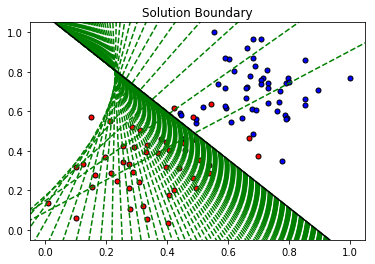

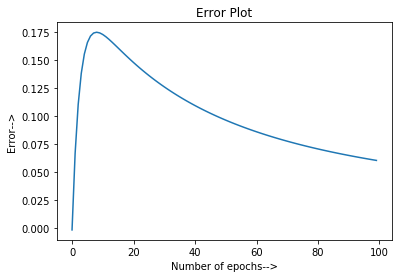

In [44]:
train(X,y,epochs,learnrate,True)